In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

In [84]:
df = pd.read_csv("../Train_knight.csv")
df

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.970,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,...,15.40,59.90,274.9,0.1733,0.12390,0.11680,0.04419,0.3220,0.09026,Sith
394,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191,Sith
395,11.640,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,Sith
396,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,...,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,Sith


In [85]:
for col in df:
	try:
		df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
	except:
		continue
df

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,0.228075,0.255326,0.217469,0.122333,0.339141,0.135019,0.066909,0.089852,0.397475,0.237907,...,0.379604,0.177250,0.092607,0.351516,0.140980,0.115735,0.184055,0.365993,0.171652,Sith
1,0.607175,0.420697,0.595743,0.473595,0.439627,0.275247,0.346857,0.521009,0.263636,0.092791,...,0.574125,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.362677,0.138463,Jedi
2,0.188793,0.253297,0.193076,0.096713,0.315910,0.305112,0.221787,0.198190,0.216667,0.382326,...,0.452055,0.197868,0.071569,0.448590,0.369561,0.381709,0.534364,0.293940,0.264200,Sith
3,0.219556,0.286439,0.225209,0.112534,0.698811,0.433602,0.239212,0.305211,0.453030,0.525349,...,0.407306,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.330118,0.247016,Sith
4,0.202518,0.342239,0.190104,0.103754,0.261345,0.071850,0.011883,0.031070,0.291414,0.313256,...,0.438661,0.129339,0.061615,0.261705,0.048452,0.020232,0.097320,0.299065,0.138331,Sith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.077476,0.070342,0.072904,0.034358,0.428957,0.101681,0.048335,0.042781,0.314646,0.509535,...,0.102892,0.047263,0.022046,0.674437,0.093732,0.093291,0.151856,0.498945,0.231011,Sith
394,0.309953,0.041596,0.304886,0.176331,0.855484,0.282192,0.161280,0.359627,0.678283,0.382558,...,0.014307,0.203944,0.103298,0.488212,0.107314,0.068203,0.254536,0.345191,0.110652,Sith
395,0.220503,0.291512,0.216847,0.114104,0.654241,0.271774,0.165807,0.191168,0.374242,0.354419,...,0.524810,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.374133,0.235668,Sith
396,0.137015,0.327697,0.139313,0.065663,0.469206,0.255348,0.144325,0.166155,0.446970,0.308372,...,0.450837,0.108621,0.043256,0.559532,0.196864,0.211182,0.335017,0.318661,0.195855,Sith


In [86]:
df['knight'] = [1 if x == 'Jedi' else 0 for x in df['knight']]

In [87]:
msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk]

X_train = train.loc[:, train.columns != 'knight']
y_train = train.loc[:, 'knight'].values
X_test = test.loc[:, test.columns != 'knight']
y_test = test.loc[:, 'knight'].values

X_train

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
1,0.607175,0.420697,0.595743,0.473595,0.439627,0.275247,0.346857,0.521009,0.263636,0.092791,...,0.689790,0.574125,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.362677,0.138463
2,0.188793,0.253297,0.193076,0.096713,0.315910,0.305112,0.221787,0.198190,0.216667,0.382326,...,0.157595,0.452055,0.197868,0.071569,0.448590,0.369561,0.381709,0.534364,0.293940,0.264200
3,0.219556,0.286439,0.225209,0.112534,0.698811,0.433602,0.239212,0.305211,0.453030,0.525349,...,0.193170,0.407306,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.330118,0.247016
4,0.202518,0.342239,0.190104,0.103754,0.261345,0.071850,0.011883,0.031070,0.291414,0.313256,...,0.142298,0.438661,0.129339,0.061615,0.261705,0.048452,0.020232,0.097320,0.299065,0.138331
5,0.525297,0.410213,0.508673,0.373489,0.107374,0.218711,0.258677,0.316950,0.358586,0.080000,...,0.420847,0.385997,0.391902,0.256292,0.112593,0.163974,0.202476,0.315498,0.242388,0.069133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.450518,0.290159,0.434040,0.294634,0.420043,0.212668,0.137477,0.265222,0.219697,0.138837,...,0.362860,0.408828,0.332636,0.202468,0.413590,0.136421,0.132827,0.313505,0.249925,0.063295
393,0.077476,0.070342,0.072904,0.034358,0.428957,0.101681,0.048335,0.042781,0.314646,0.509535,...,0.056101,0.102892,0.047263,0.022046,0.674437,0.093732,0.093291,0.151856,0.498945,0.231011
394,0.309953,0.041596,0.304886,0.176331,0.855484,0.282192,0.161280,0.359627,0.678283,0.382558,...,0.218783,0.014307,0.203944,0.103298,0.488212,0.107314,0.068203,0.254536,0.345191,0.110652
395,0.220503,0.291512,0.216847,0.114104,0.654241,0.271774,0.165807,0.191168,0.374242,0.354419,...,0.185343,0.524810,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.374133,0.235668


In [88]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [89]:
predictions = clf.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 0]


In [90]:
conf_matrix = np.zeros((2, 2))
for a, p in zip(y_test, predictions):
    conf_matrix[a][p] += 1

precision_jedi = (conf_matrix[1][1]) / (conf_matrix[1][1] + conf_matrix[0][1])
precision_sith = (conf_matrix[0][0]) / (conf_matrix[0][0] + conf_matrix[1][0])

recall_jedi = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
recall_sith = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

f1score_jedi = 2 * (precision_jedi * recall_jedi) / (precision_jedi + recall_jedi)
f1score_sith = 2 * (precision_sith * recall_sith) / (precision_sith + recall_sith)

unique, counts = np.unique(y_test, return_counts=True)

print(counts)

df = pd.DataFrame({
    "precision": [precision_jedi, precision_sith],
    "recall": [recall_jedi, recall_sith],
    "f1-score": [f1score_jedi, f1score_sith],
    "total": [counts[0], counts[1]]
}, index=['Jedi', 'Sith'])

df.loc['accuracy'] = ['', '', df['f1-score'].mean(), df['total'].sum()]
df.round(2)

[57 27]


,precision,recall,f1-score,total
Jedi,0.866667,0.962963,0.91,57
Sith,0.981481,0.929825,0.95,27
accuracy,,,0.93,84


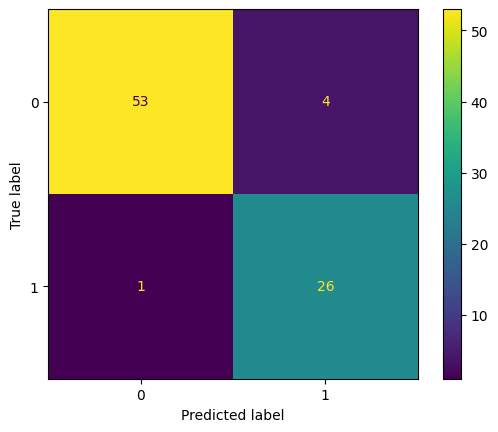

In [91]:
cm_display = metrics.ConfusionMatrixDisplay(conf_matrix)

cm_display.plot()
plt.show()

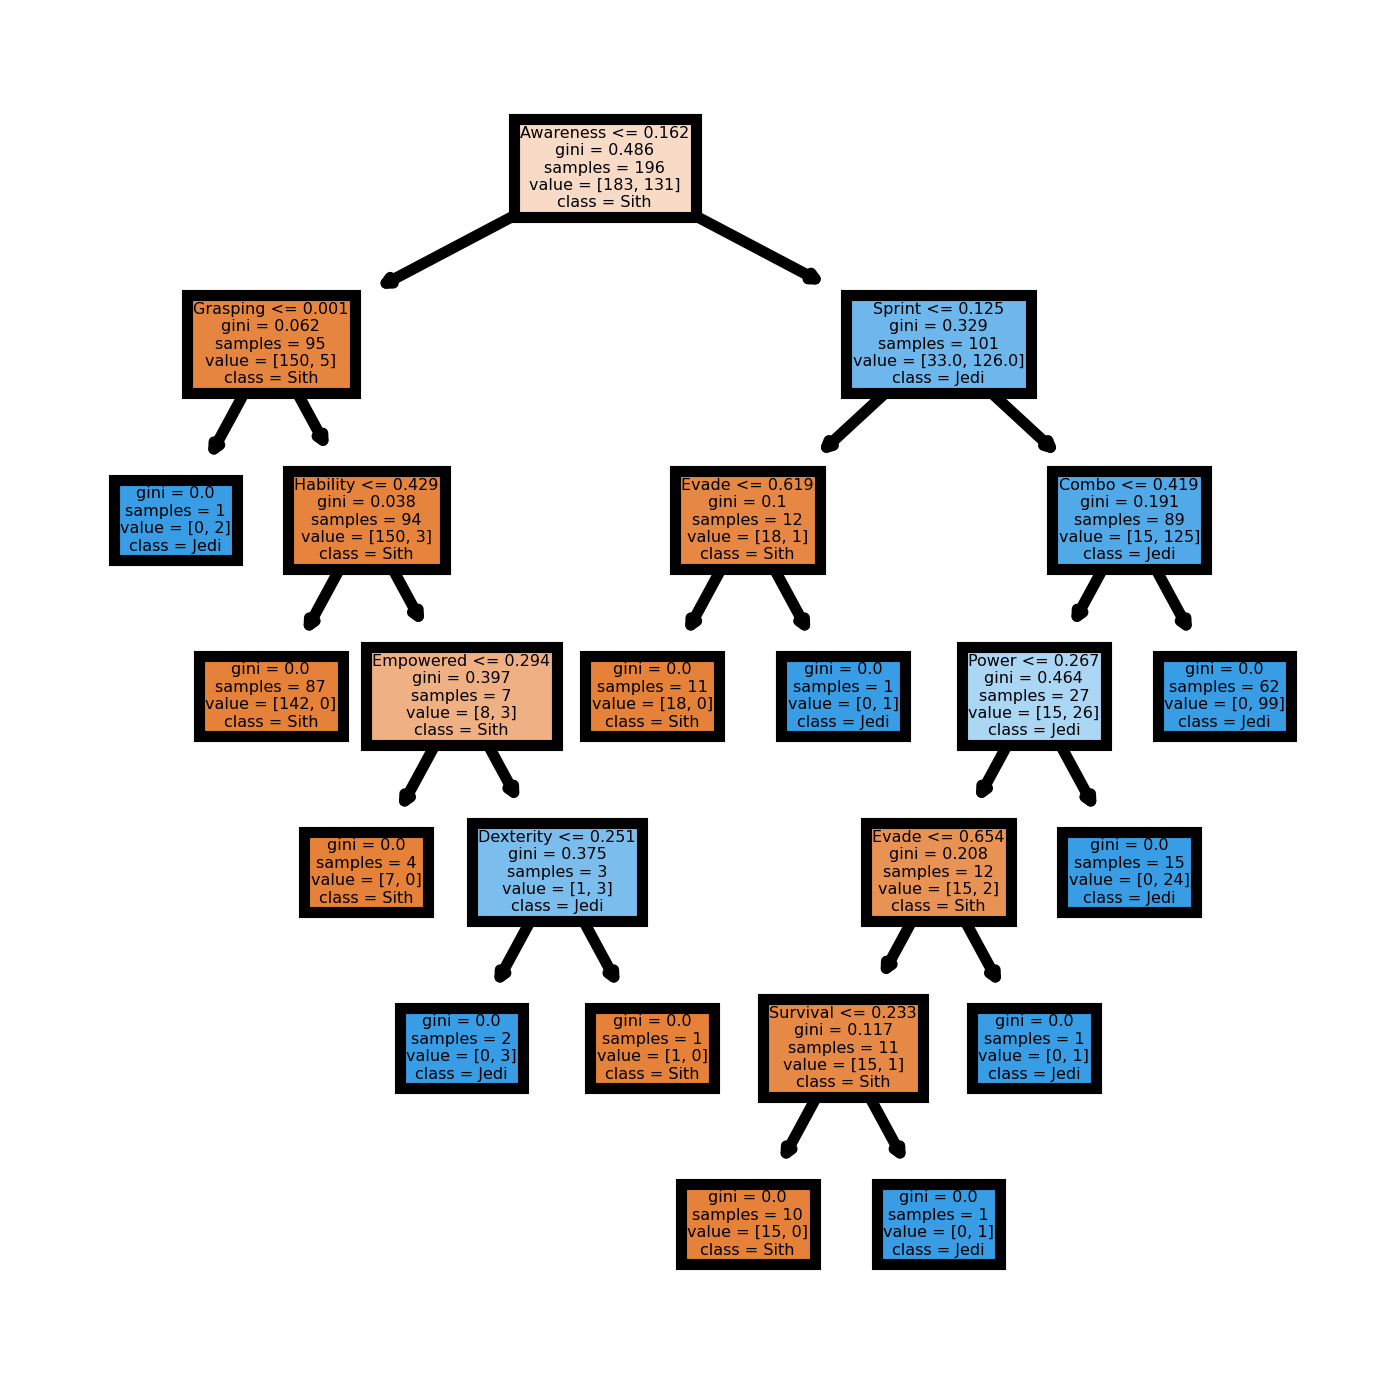

In [92]:
fn = X_train.columns
cn = ['Sith', 'Jedi']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True)
plt.show()